In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('data/aws_vectorized_data_table.csv')

In [3]:
data.head()

,Unnamed: 0,paperId,externalIds,publicationVenue,title,abstract,year,referenceCount,citationCount,influentialCitationCount,fieldsOfStudy,s2FieldsOfStudy,publicationTypes,publicationDate,title_abstract,topic_code,topic_list,x_vector,y_vector,z_vector
0,0,a161b8b828721303918ddcf1e0239cee6c752611,"{'MAG': '2107845890', 'DOI': '10.1002/wics.73'...",NaN,Response surface methodology,The purpose of this article is to provide a su...,2010,164,3101,223,"['Mathematics', 'Computer Science']","[{'category': 'Mathematics', 'source': 'extern...",['Review'],2010-03-01,Response surface methodology purpose article p...,56,56_bayesian_models_distribution_estimation,7.380698,5.865145,5.345849
1,1,03bf6ea4fc6ef1b087426956e7e4613a336c8909,"{'MAG': '1965601576', 'ArXiv': '1312.1300', 'D...",NaN,Planck 2013 results. XI. All-sky model of ther...,This paper presents an all-sky model of dust e...,2013,153,499,3,['Physics'],"[{'category': 'Physics', 'source': 'external'}...",['Review'],2013-12-04,Planck 2013 results. XI. All-sky model thermal...,17,17_galaxies_stellar_stars_galaxy,9.168907,1.740706,5.859986
2,2,4435fed9747a80379e3239dff6eb03f36391b346,"{'MAG': '2904283805', 'DOI': '10.1016/J.MSEA.2...","{'id': '268fab6e-dcd8-4d9e-bdcb-0b08f011157d',...",Controlling martensitic decomposition during s...,NaN,2019,54,79,1,['Materials Science'],"[{'category': 'Materials Science', 'source': '...",NaN,2019-01-01,Controlling martensitic decomposition selectiv...,12,12_stress_elastic_deformation_theory,7.007022,1.823923,7.761041
3,3,bacbbee747e3d482fdccda6a471d2c7ae6122b6f,"{'MAG': '2313014471', 'DOI': '10.1097/IAE.0000...","{'id': '5f0f1370-d1a6-457e-aaec-864eb4c655d1',...",OPTICAL COHERENCE TOMOGRAPHY ANGIOGRAPHY VERSU...,Purpose: To compare optical coherence tomograp...,2015,27,259,12,['Medicine'],"[{'category': 'Medicine', 'source': 'external'...","['Study', 'JournalArticle']",2015-11-01,OPTICAL COHERENCE TOMOGRAPHY ANGIOGRAPHY VERSU...,96,96_cnv_choroidal_neovascularization_choroidal ...,-0.605132,5.484316,2.975703
4,4,6e997f2880d3548552111ae32bd0644394892f69,"{'MAG': '2140405850', 'DOI': '10.1093/BRAIN/12...",NaN,Differential cognitive effects of colloid cyst...,"A series of twelve cases, all of whom had rece...",2000,64,208,13,"['Psychology', 'Medicine']","[{'category': 'Psychology', 'source': 'externa...","['JournalArticle', 'CaseReport']",2000-04-01,Differential cognitive effects colloid cysts v...,6,6_cortex_motor_memory_visual,3.242952,6.717288,4.112037


In [4]:
import pandas as pd

# Assuming 'data#' is your DataFrame containing the data
# You can read a CSV file into a DataFrame like this:
# df = pd.read_csv('your_file.csv')

# Count NaN values in the entire DataFrame
nan_count = data.isna().sum().sum()

# Alternatively, count NaN values in each column separately
nan_count_per_column = data.isna().sum()

print("Total NaN values in the DataFrame:", nan_count)
print("NaN count per column:")
print(nan_count_per_column)


Total NaN values in the DataFrame: 67015
NaN count per column:
Unnamed: 0                      0
paperId                         0
externalIds                     0
publicationVenue            23160
title                           0
abstract                    15252
year                            0
referenceCount                  0
citationCount                   0
influentialCitationCount        0
fieldsOfStudy                1449
s2FieldsOfStudy                 0
publicationTypes            19604
publicationDate              7549
title_abstract                  1
topic_code                      0
topic_list                      0
x_vector                        0
y_vector                        0
z_vector                        0
dtype: int64


In [5]:
# Sample data (replace this with your actual data)

# Method 1: Using a loop
has_zeros = False
for value in data:
    if value == 0:
        has_zeros = True
        break

if has_zeros:
    print("There are zero values in your data.")
else:
    print("There are no zero values in your data.")

# Method 2: Using the `any` function
has_zeros = any(value == 0 for value in data)

if has_zeros:
    print("There are zero values in your data.")
else:
    print("There are no zero values in your data.")


There are no zero values in your data.
There are no zero values in your data.


In [6]:
# Check the data types of columns
column_types = data.dtypes
print(column_types)


Unnamed: 0                    int64
paperId                      object
externalIds                  object
publicationVenue             object
title                        object
abstract                     object
year                          int64
referenceCount                int64
citationCount                 int64
influentialCitationCount      int64
fieldsOfStudy                object
s2FieldsOfStudy              object
publicationTypes             object
publicationDate              object
title_abstract               object
topic_code                    int64
topic_list                   object
x_vector                    float64
y_vector                    float64
z_vector                    float64
dtype: object


In [7]:
# Drop rows with missing values
data = data.dropna()
data = data.drop(columns=['topic_list','paperId','publicationDate','title','Unnamed: 0'])



In [9]:
# Drop rows containing "covid" in 'title' or 'abstract' (case-insensitive)
data = data[ ~data['abstract'].str.lower().str.contains('covid', na=False)]

# Reset the index if you want consecutive index values
data.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
print(data)


                                             externalIds   
0      {'MAG': '2313014471', 'DOI': '10.1097/IAE.0000...  \
1      {'MAG': '1495177956', 'DOI': '10.1542/peds.73....   
2      {'MAG': '2583429100', 'DOI': '10.1097/00004647...   
3      {'MAG': '2101037111', 'DOI': '10.1161/CIRCULAT...   
4      {'MAG': '2091426227', 'DOI': '10.1073/PNAS.78....   
...                                                  ...   
19169  {'MAG': '2125372059', 'DOI': '10.1001/ARCHOPHT...   
19170  {'MAG': '2034051988', 'DOI': '10.1002/1097-014...   
19171  {'MAG': '1996115861', 'DOI': '10.1203/00006450...   
19172  {'MAG': '1980528742', 'DOI': '10.1001/ARCHOTOL...   
19173  {'MAG': '2005094129', 'DOI': '10.1017/S0022112...   

                                        publicationVenue   
0      {'id': '5f0f1370-d1a6-457e-aaec-864eb4c655d1',...  \
1      {'id': '02bf11d4-dd88-4e0e-b7c4-084d3fa17c2f',...   
2      {'id': 'aa061475-8248-43ff-81af-ad4fd4ab06a4',...   
3      {'id': '0d67273f-71c8-43f4-a642-

In [10]:
data.to_csv('clean_aws_vectorized_data_table.csv',index=False)


In [11]:
data.head()

,externalIds,publicationVenue,abstract,year,referenceCount,citationCount,influentialCitationCount,fieldsOfStudy,s2FieldsOfStudy,publicationTypes,title_abstract,topic_code,x_vector,y_vector,z_vector
0,"{'MAG': '2313014471', 'DOI': '10.1097/IAE.0000...","{'id': '5f0f1370-d1a6-457e-aaec-864eb4c655d1',...",Purpose: To compare optical coherence tomograp...,2015,27,259,12,['Medicine'],"[{'category': 'Medicine', 'source': 'external'...","['Study', 'JournalArticle']",OPTICAL COHERENCE TOMOGRAPHY ANGIOGRAPHY VERSU...,96,-0.605132,5.484316,2.975703
1,"{'MAG': '1495177956', 'DOI': '10.1542/peds.73....","{'id': '02bf11d4-dd88-4e0e-b7c4-084d3fa17c2f',...",Village-based surveillance data from longitudi...,1984,0,337,11,['Medicine'],"[{'category': 'Medicine', 'source': 'external'...",['JournalArticle'],Effects diarrhea associated specific enteropat...,1,0.764095,4.127537,9.289840
2,"{'MAG': '2583429100', 'DOI': '10.1097/00004647...","{'id': 'aa061475-8248-43ff-81af-ad4fd4ab06a4',...",The analysis of functional mapping experiments...,1996,22,881,71,"['Computer Science', 'Medicine']","[{'category': 'Computer Science', 'source': 'e...","['Review', 'JournalArticle']",Nonparametric Analysis Statistic Images Functi...,-1,2.623203,7.092527,4.544437
3,"{'MAG': '2101037111', 'DOI': '10.1161/CIRCULAT...","{'id': '0d67273f-71c8-43f4-a642-9c384870ccb2',...",Background— Noninvasive imaging of adhesion mo...,2006,44,580,21,['Medicine'],"[{'category': 'Medicine', 'source': 'external'...",['JournalArticle'],Noninvasive Vascular Cell Adhesion Molecule-1 ...,30,2.821630,1.614346,6.371195
4,"{'MAG': '2091426227', 'DOI': '10.1073/PNAS.78....","{'id': 'bb95bf2e-8383-4748-bf9d-d6906d091085',...",The coding sequence for Anabaena 7120 glutamin...,1981,0,93,6,"['Medicine', 'Biology']","[{'category': 'Medicine', 'source': 'external'...",['JournalArticle'],cloned cyanobacterial gene glutamine synthetas...,1,1.802745,3.267968,8.385246


In [12]:
import pandas as pd

# Define chunk size
chunk_size = 100  # Adjust this based on your system's memory capacity

# Initialize an empty DataFrame for aggregated results
data = pd.DataFrame()

# Iterate through the CSV file in chunks
for chunk in pd.read_csv('./clean_aws_vectorized_data_table.csv', chunksize=chunk_size):
    # Process each chunk as needed
    processed_chunk = chunk  # Replace this with your processing logic
    
    # Aggregate results from the current chunk
    data = pd.concat([data, processed_chunk], ignore_index=True)

# Now, data contains the aggregated data from all chunks


In [13]:
# Perform one-hot encoding for 'fieldsOfStudy'
# List of categorical columns to one-hot encode
categorical_columns = ['fieldsOfStudy', 'publicationTypes','externalIds','title_abstract','externalIds','publicationVenue','abstract','s2FieldsOfStudy']

# Perform one-hot encoding for categorical features
data = pd.get_dummies(data, columns=categorical_columns, prefix=categorical_columns)

In [ ]:
# # Assuming 'publicationDate' is in a date format, if not, you may need to parse it as a date first
# data['publicationDate'] = pd.to_datetime(data['publicationDate'])

# # Extract the year from the date
# data['publicationDate'] = data['publicationDate'].dt.year

# # Convert the 'publicationDate' column to integer
# data['publicationDate'] = data['publicationDate'].astype(int)


In [ ]:
data.head()

In [14]:
X = data.drop(columns=['topic_code'])

# Target vartiable
y = data['topic_code']

In [15]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training and 20% testing changes to 0.4 to reduce the data size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [ ]:
# from sklearn.linear_model import LinearRegression

# # Instantiate the model
# model = LinearRegression()

# # Fit the model to the training data
# model.fit(X_train, y_train)


In [ ]:
# from scipy.sparse import csr_matrix

# X_train_sparse = csr_matrix(X_train)


In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.linear_model import Lasso
# # Create a PCA model with a reduced number of components
# pca = PCA(n_components=100)  # Adjust the number of components as needed

# # Fit and transform the training data
# X_train_pca = pca.fit_transform(X_train)

# # Fit the Lasso model on the reduced feature space
# lasso.fit(X_train_pca, y_train)


In [16]:
from sklearn.linear_model import Lasso
# Create a Lasso regression model
lasso_model = Lasso(alpha=0.01)  # You can adjust the alpha hyperparameter

# Fit the model to the training data
lasso_model.fit(X_train, y_train)


Lasso(alpha=0.01)

In [ ]:
# from sklearn.linear_model import Ridge
# # Split your dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a Ridge regression model
# ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha hyperparameter

# # Fit the model to the training data
# ridge_model.fit(X_train, y_train)

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the testing data
y_pred = lasso_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


Mean Squared Error: 752.533284590817
Mean Absolute Error: 20.80629038033207
R-squared: 0.10261147306169038


In [18]:
# Create a dataset for future predictions (increment 'year' by 10)
future_data = X_test.copy()
future_data['year'] += 10

# Make predictions for the new data
new_topic_predictions = lasso_model.predict(future_data)


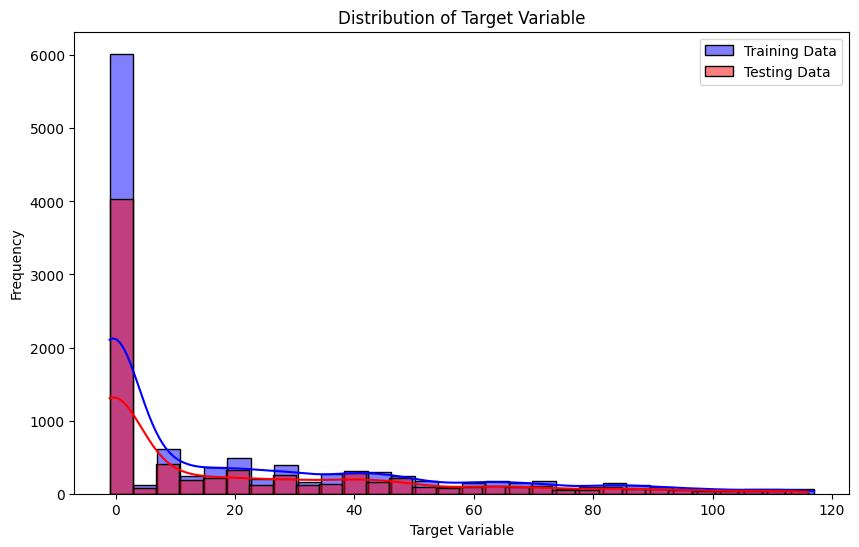

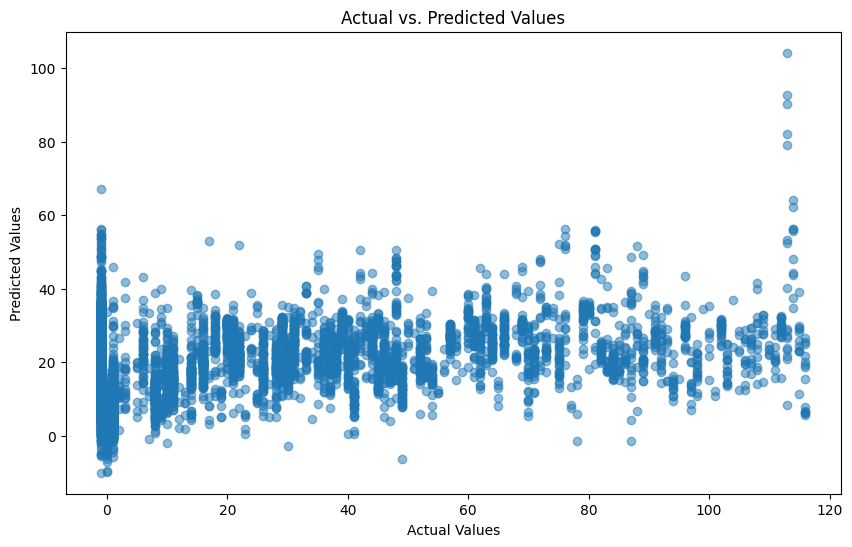

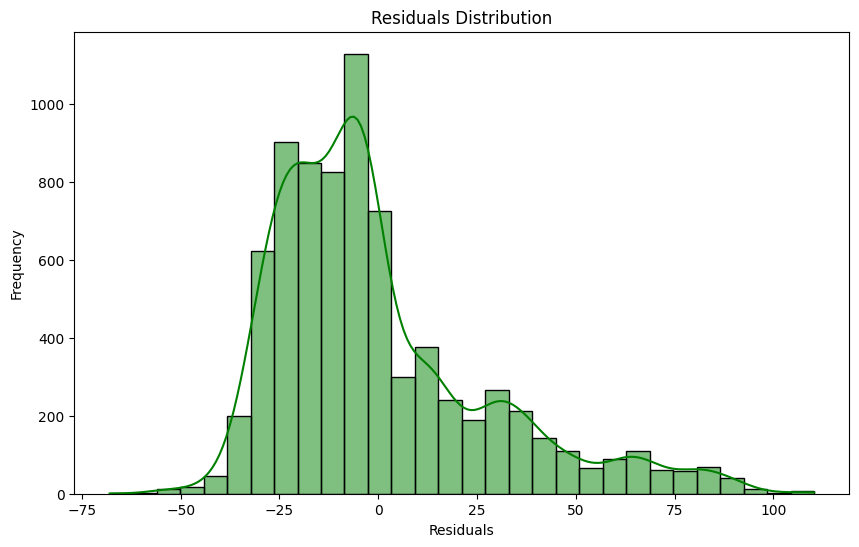

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of target variable (y)
plt.figure(figsize=(10, 6))
sns.histplot(y_train, bins=30, kde=True, color='blue', label='Training Data')
sns.histplot(y_test, bins=30, kde=True, color='red', label='Testing Data')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Target Variable')
plt.show()

# Visualize the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

# Plot the residuals (difference between actual and predicted values)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='green')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()


In [24]:
import plotly.express as px
import plotly.graph_objs as go

# Distribution of Target Variable
fig = px.histogram(x=y_train, nbins=30, opacity=0.7, color_discrete_sequence=['blue'], labels={'x': 'Target Variable'})
fig.add_trace(go.Histogram(x=y_test, nbinsx=30, opacity=0.7, name='Testing Data', marker_color='red'))  # Add the test data histogram trace
fig.update_layout(
    xaxis_title='Target Variable',
    yaxis_title='Frequency',
    title='Distribution of Target Variable'
)
fig.show()

# Scatter Plot of Actual vs. Predicted Values
fig = px.scatter(x=y_test, y=y_pred, opacity=0.5, labels={'x': 'Actual Values', 'y': 'Predicted Values'})
fig.update_layout(
    xaxis_title='Actual Values',
    yaxis_title='Predicted Values',
    title='Actual vs. Predicted Values'
)
fig.show()

# Residuals Distribution
fig = px.histogram(x=residuals, nbins=30, opacity=0.7, color_discrete_sequence=['green'], labels={'x': 'Residuals'})
fig.update_layout(
    xaxis_title='Residuals',
    yaxis_title='Frequency',
    title='Residuals Distribution'
)
fig.show()
